In [1]:
import platform
print(platform.python_version())

3.7.3


In [2]:
import warnings
warnings.filterwarnings(action = 'once')

In [3]:
# import dataiku
import csv
import pandas as pd
import numpy as np
# from dataiku import pandasutils as pdu
import os
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import re
from statistics import mean
import matplotlib.pyplot as plt

In [4]:
col_names =  ['PA_ID', 'SMILES', 'Tm']
dfA  = pd.DataFrame(columns = col_names)

suppl = Chem.SDMolSupplier('AFile.sdf')
for mol in suppl:
    if mol is None: continue
    if mol.GetNumAtoms() < 1: continue
    try:
        dfA.loc[len(dfA)] = [mol.GetProp('PA_ID'), Chem.MolToSmiles(mol), mol.GetProp('Tm')]
    except:
        continue


In [5]:
dfA.shape

(1578, 3)

In [6]:
dfA.sample(5).head()

PA_ID                                             SMILES  \
698   A1641             CCCCCCCCCCCCCCCCCCSSCCCCCCCCCCCCCCCCCC   
1095  A2173                                   NNC(=O)c1ccccc1O   
512   A1275                               CCN(CC)C(=O)CCC(=O)O   
1206  A2318  CCCC/C=C(\CC)CNC=C1C=C(C(C)(C)C)C(=O)C(C(C)(C)...   
172    A461                          CC(=O)CCc1c(O)ccc2ccccc12   

                                                   Tm  
698   5.900000000000000e+001 - 6.000000000000000e+001  
1095  1.490000000000000e+002 - 1.510000000000000e+002  
512   8.000000000000000e+001 - 8.200000000000000e+001  
1206  1.010000000000000e+002 - 1.030000000000000e+002  
172   8.500000000000000e+001 - 8.700000000000000e+001

In [7]:
def meltTemp(value):
    x = value.split(" - ")
    if len(x) == 1:
        melt_temp = float(x[0])
    else:
        y = (float(x[0]), float(x[1]))
        melt_temp = mean(y)
    return(melt_temp)

In [8]:
for i, row in dfA.iterrows():
    dfA.loc[i, 'melt_temp'] = meltTemp(dfA.loc[i, 'Tm'])

In [9]:
dfA.sample(5).head()

PA_ID                                             SMILES  \
1332  A2471                        O=C(N/N=C/c1ccco1)c1ccccc1O   
1178  A2289                 CCc1cccc(CC)c1NC(=S)NC(=O)c1ccccc1   
855   A1875  CC(C)(C)c1cc(Cc2cc(Cc3cc(C(C)(C)C)c(O)c(C(C)(C...   
604   A1483  CC(C)(C)c1cc(CCC(=O)OC2C(OC(=O)CCc3cc(C(C)(C)C...   
356    A953                        Oc1ccc(/C=N/c2ccc(O)cc2)cc1   

                                                   Tm  melt_temp  
1332  2.310000000000000e+002 - 2.330000000000000e+002      232.0  
1178                           1.330000000000000e+002      133.0  
855   2.580000000000000e+002 - 2.600000000000000e+002      259.0  
604   2.030000000000000e+002 - 5.000000000000000e+000      104.0  
356   2.080000000000000e+002 - 1.000000000000000e+001      109.0

In [11]:
plt.hist(dfA['melt_temp'].array, bins = range(0, 500, 10))

(array([66.,  0.,  7., 22., 24., 48., 54., 66., 65., 70., 77., 91., 79.,
        90., 84., 89., 68., 64., 76., 78., 57., 50., 35., 54., 34., 26.,
        32., 15., 21.,  6.,  6.,  9.,  3.,  2.,  4.,  2.,  2.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]),
 <a list of 49 Patch objects>)

In [12]:
dfA.to_csv('AFile.csv')

In [13]:
dfA.loc[[0]]

PA_ID                                           SMILES  \
0    A1  Cc1cc(Cc2cc(C)cc(C(C)(C)C)c2O)c(O)c(C(C)(C)C)c1   

                                                Tm  melt_temp  
0  1.300000000000000e+002 - 1.320000000000000e+002      131.0

In [14]:
molsA = []
with open('AFile.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        m = Chem.MolFromSmiles(row[2])
        molsA.append((m, row[1]))

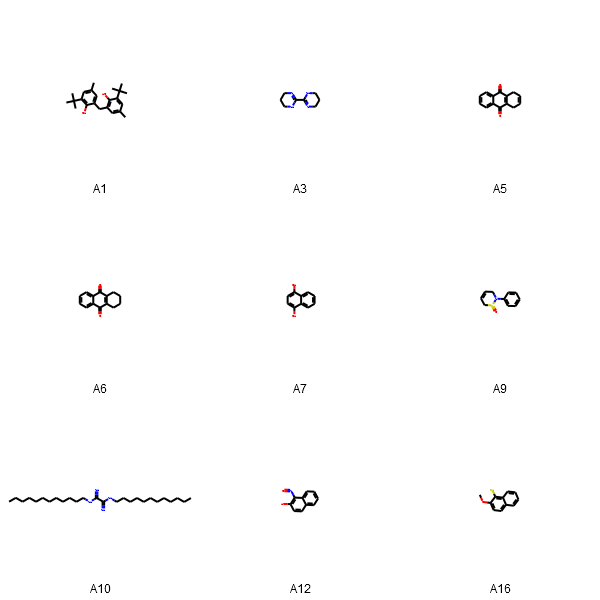

In [15]:
Draw.MolsToGridImage([m[0] for m in molsA[1:10]],
                    legends=[m[1] for m in molsA[1:10]],
                    molsPerRow=3)